# Exploratory Data Analysis on the Ratings dataset

This [anime ratings dataset](https://www.kaggle.com/marlesson/myanimelist-dataset-animes-profiles-reviews?select=animes.csv) is obtained from kaggle and contains three files viz.

- **animes.csv**: contains list of anime, with title, title synonyms, genre, duration, rank, populatiry, score, airing date, episodes and many other important data about individual anime providing sufficient information about trends in time about important aspects of anime. Rank is in float format in csv, but it contains only integer value. This is due to NaN values and their representation in pandas.

- **profiles.csv**: contains information about users who watch anime, namely username, birth date, gender, and favorite animes list.

- **reviews.csv** contains information about reviews users x animes, with text review and scores.

I have modified the last file slightly to remove the text reviews currently to reduce the file size. I may incorporate the same at a later stage when I use it for doing recommendations.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
anime_data = pd.read_csv("../data/animes.csv")
profile_data = pd.read_csv("../data/profiles.csv")
reviews_data = pd.read_csv("../data/reviews.csv")

 Let's have a look at the dimensionality of the data we're dealing with

In [3]:
anime_data = anime_data.drop_duplicates(subset = ["uid"]).reset_index(drop = True)
anime_data.shape

(16216, 12)

In [4]:
profile_data.shape

(81727, 5)

In [5]:
reviews_data.shape

(192112, 3)

We see that we have around 16k anime, 81k subscribers and around `192k` ratings data. 

Ideally if every user had rated every anime, we would have had `16k x 81k` i.e. close to 1.3 billion ratings. But mostly that's never the case. We always have a long-tail sparse distribution of most popular items being rated many times and relatively less popular items being rated very few times to no times. 

Let us visualize this long tail distribution.

In [6]:
reviewed_anime_counts = reviews_data.groupby(by = "anime_uid")["score"].count()
len(reviewed_anime_counts)

8113

 Out of the `16k odd anime`, there's only 8113 anime which are rated at least once, the rest are never even rated by the provided set of users till 2019 as per the dataset...

In [7]:
ids = list(reviewed_anime_counts.sort_values(ascending = False).index)
rating_count = list(reviewed_anime_counts.sort_values(ascending = False))
temp = pd.DataFrame({"anime": [str(x) for x in ids], "rating_count": rating_count})

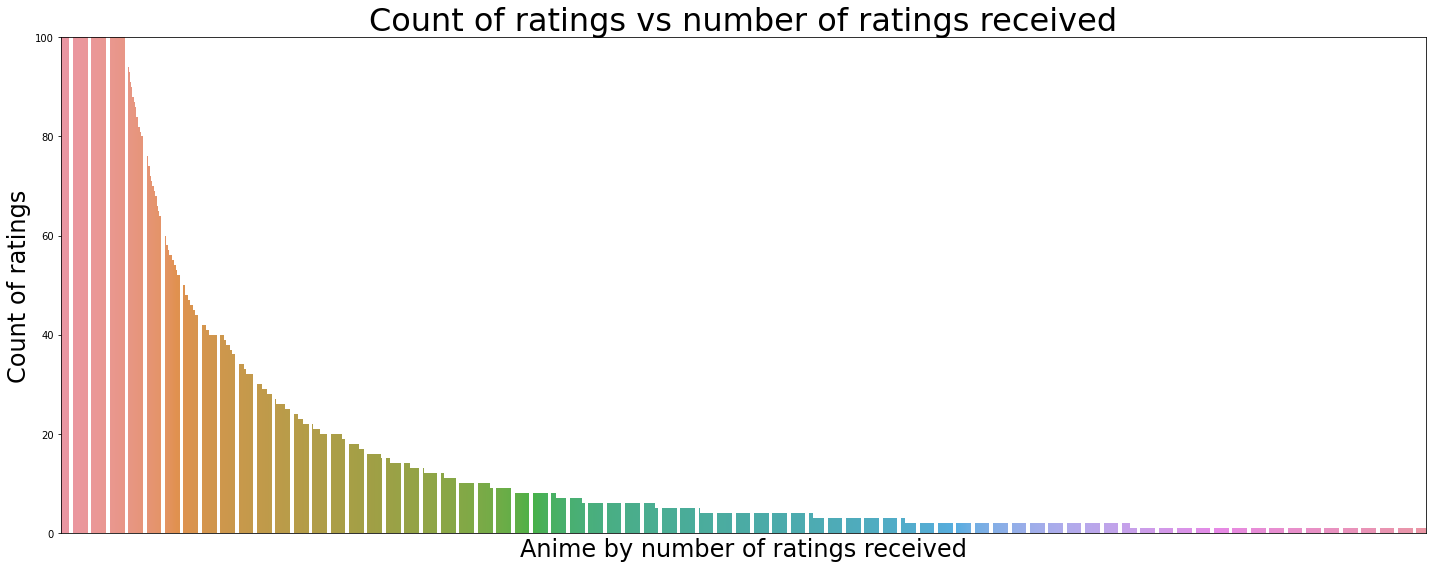

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
sns.barplot(x = "anime", y = "rating_count", data = temp, ax = ax)
plt.xticks([])
plt.xlabel("Anime by number of ratings received", fontsize = 24)
plt.ylabel("Count of ratings",  fontsize = 24)
plt.title("Count of ratings vs number of ratings received", fontsize = 32)
plt.ylim([0, 100])
fig.tight_layout();

Thus we see the long tailed distribution in terms of number of ratings given to the anime by different users. 

We could do a simple EDA for the rest of the features that we have available about both the anime and the users. Let's do it.

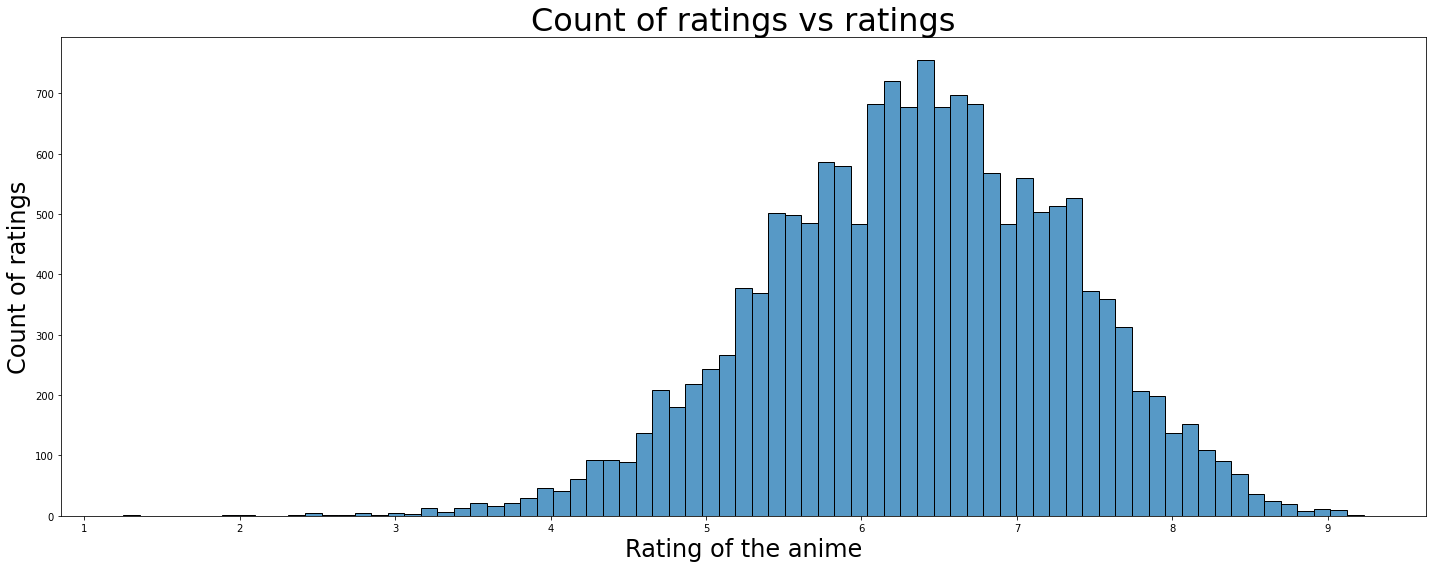

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
sns.histplot(anime_data.score, ax = ax)
plt.xlabel("Rating of the anime", fontsize = 24)
plt.ylabel("Count of ratings",  fontsize = 24)
plt.title("Count of ratings vs ratings", fontsize = 32)
fig.tight_layout();

We can see that the ratings are almost uniformly distributed with close to 6.5 as the mean and it's a left-skewed distribution i.e. has a longer left tail i.e. number of users who give a very low rating are relatively few in the dataset.

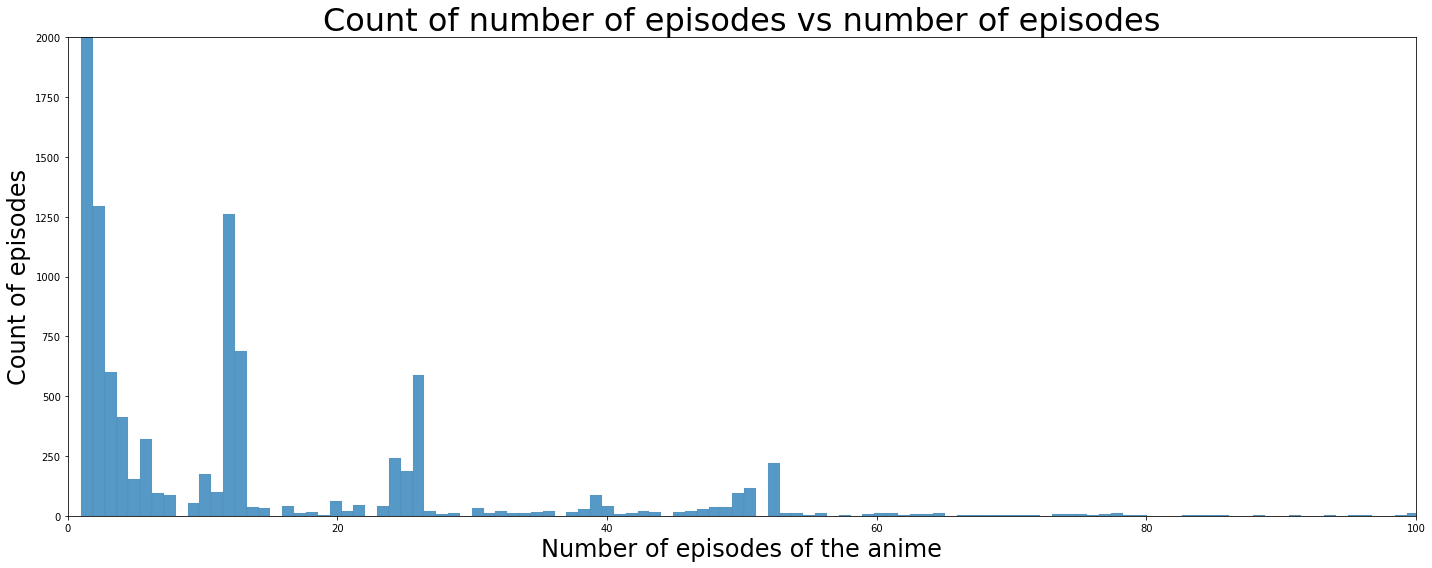

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
sns.histplot(anime_data.episodes, ax = ax)
plt.xlabel("Number of episodes of the anime", fontsize = 24)
plt.ylabel("Count of episodes",  fontsize = 24)
plt.title("Count of number of episodes vs number of episodes", fontsize = 32)
plt.ylim([0, 2000])
plt.xlim([0, 100])
fig.tight_layout();

We can see that most of them have a few number of episodes and many of them are also movies which is why the number of entries with one episode is very high.

Let's see the number of users and how many times each user has rated animes. 

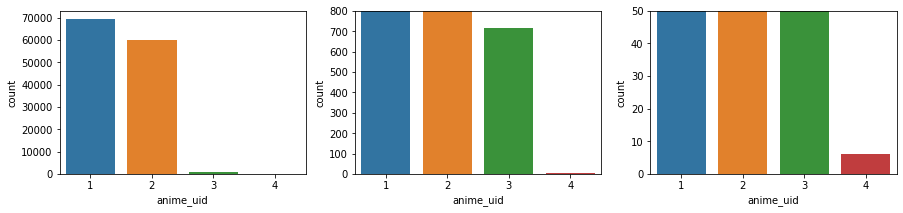

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (15, 3))
review_descending = reviews_data.groupby(by = ["uid"])["anime_uid"].count().sort_values(ascending = False)

sns.countplot(x = review_descending, ax = ax[0]);
sns.countplot(x = review_descending, ax = ax[1]);
sns.countplot(x = review_descending, ax = ax[2]);

ax[1].set_ylim([0, 800])
ax[2].set_ylim([0, 50]);

As we can see, there's only close to 5 users who rated 4 anime, around 700 users who rated 3 anime and most of the users have rated only 1 or 2 anime in the entire corpus of reviews...